In [1]:
import os
import sys
import scipy.io as sio
import scipy.sparse as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp
import re
import io
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

%matplotlib inline

from IPython.display import clear_output

In [5]:
# outfile = './output/zoo2_gcn_l3_mwis_training.out'
# outfile = './output/zoo4_gcn_l3_mwis_training.out'
# outfile = './output/train_MWISTwinTr_l3_foo.out'

outfile_dict = {
    'ZOO2':    './output/zoo2_gcn_l3_mwis_training.out',
    'ZOO11':   './output/zoo4_gcn_l3_mwis_training.out',
    'Twin':    './output/train_MWISTwinTr_l3_foo.out'
}


In [7]:
def read_out_file(outfile):
    with open(outfile) as f:
        firstline = f.readline().rstrip()
    firstline = firstline.replace(": ",":")
    firstline

    header_text = firstline.split(":")
    header = []
    for htext in header_text:
        temp = htext.replace(" ", ",", 1)
        header.append(temp.split(",")[-1])
    header = header[0:-1]

    # with open(outfile) as f:
    #     text = f.read()
    text = ''
    with open(outfile) as f:
        for line in f:
            if not "Actor loaded " in line:
                text += line
    # print(text)
    #     text = f.read()

    for item in header:
        text = text.replace(item+":", ",")
    text = text.replace(" ","")
    textIO = io.StringIO(text)
    df = pd.read_csv(textIO, names=header, header=None, index_col=0)
    df.reset_index(drop=True, inplace=True)
    
    for item in ['Actor']:
        item_index = df['Model'] == item
        df_tmp = df[item_index].reset_index(drop=True)    
        df_tmp['Best_Ratio'] = df_tmp['Test_Ratio'].cummax()

    return df_tmp

In [117]:
for item in ['Actor']:
    item_index = df['Model'] == item
    df_tmp = df[item_index].reset_index(drop=True)    
    df_tmp['Best_Ratio'] = df_tmp['Test_Ratio'].cummax()
df_tmp

,Epoch,ID,Model,Train_Ratio,Test_Ratio,Loss,L_Avg,Track,runtime,z_avg,Best_Ratio
0,0,100,Actor,1.0094,1.0147,1.0094,1.0094,-1.0053,6.39,0.475,1.0147
1,0,200,Actor,1.0163,1.0146,1.0087,1.0090,-1.0058,7.73,0.479,1.0147
2,0,300,Actor,1.0094,1.0156,1.0104,1.0095,-1.0051,7.69,0.486,1.0156
3,0,400,Actor,1.0197,1.0194,1.0078,1.0091,-1.0115,8.32,0.484,1.0194
4,0,500,Actor,1.0164,1.0190,1.0186,1.0110,-1.0004,7.31,0.484,1.0194
...,...,...,...,...,...,...,...,...,...,...,...
192,3,1600,Actor,1.0313,1.0441,1.0492,1.0399,-0.9951,7.56,0.549,1.0469
193,3,1700,Actor,1.0668,1.0437,1.0406,1.0399,-1.0030,7.30,0.546,1.0469
194,3,1800,Actor,1.0243,1.0437,1.0385,1.0398,-1.0050,7.84,0.537,1.0469
195,3,1900,Actor,1.0365,1.0427,1.0564,1.0407,-0.9870,7.46,0.537,1.0469


In [8]:
samples_dict = {
    'ZOO2': 2,
    'ZOO11': 11,
    'Twin': 1
}

label_dict = {
    'ZOO2': 'ZOO-2 points',
    'ZOO11': 'ZOO-11 points',
    'Twin': 'GDPG-Twin-1 point'
}

training_set_size=5900

df_mwis = pd.DataFrame([])
for key in outfile_dict:
    outfile = outfile_dict[key]
    df_tmp = read_out_file(outfile)
    df_tmp['sample'] = samples_dict[key]
    df_tmp['train'] = label_dict[key]
    df_mwis = pd.concat([df_mwis, df_tmp], axis=0, ignore_index=True)

df_mwis['calls'] = (df_mwis['Epoch']*training_set_size+df_mwis['ID'])*df_mwis['sample']


In [9]:
df_mwis

,Epoch,ID,Model,Train_Ratio,Test_Ratio,Loss,L_Avg,Track,runtime,z_avg,Best_Ratio,sample,train,Corr,calls
0,0,100,Actor,1.0094,1.0147,1.0094,1.0094,-1.0053,6.39,0.475,1.0147,2,ZOO-2 points,NaN,200
1,0,200,Actor,1.0163,1.0146,1.0087,1.0090,-1.0058,7.73,0.479,1.0147,2,ZOO-2 points,NaN,400
2,0,300,Actor,1.0094,1.0156,1.0104,1.0095,-1.0051,7.69,0.486,1.0156,2,ZOO-2 points,NaN,600
3,0,400,Actor,1.0197,1.0194,1.0078,1.0091,-1.0115,8.32,0.484,1.0194,2,ZOO-2 points,NaN,800
4,0,500,Actor,1.0164,1.0190,1.0186,1.0110,-1.0004,7.31,0.484,1.0194,2,ZOO-2 points,NaN,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0,5900,Actor,1.0603,1.0455,-0.2067,0.2856,5.0571,11.53,1.110,1.0493,1,GDPG-Twin-1 point,0.3806,5900
1436,1,100,Actor,1.0433,1.0463,-0.1156,0.2885,9.0517,9.74,0.937,1.0493,1,GDPG-Twin-1 point,0.4162,6000
1437,1,200,Actor,1.0330,1.0427,-0.2239,0.2840,4.6567,11.07,1.036,1.0493,1,GDPG-Twin-1 point,0.4244,6100
1438,1,300,Actor,1.0302,1.0459,-0.1330,0.2788,7.8621,12.28,1.060,1.0493,1,GDPG-Twin-1 point,0.4062,6200


In [10]:
df_tmp = df_mwis[df_mwis['Model']=='Actor'].reset_index(drop=True)    
df_tmp1 = df_tmp.copy()
df_tmp2 = df_tmp.copy()
df_tmp1['ratio'] = df_tmp1['Train_Ratio']
df_tmp1['type'] = 'Training'
df_tmp2['ratio'] = df_tmp2['Test_Ratio']
df_tmp2['type'] = 'Validation'
df_tmp = pd.concat([df_tmp1,df_tmp2], axis=0, ignore_index=True)
df_tmp

,Epoch,ID,Model,Train_Ratio,Test_Ratio,Loss,L_Avg,Track,runtime,z_avg,Best_Ratio,sample,train,Corr,calls,ratio,type
0,0,100,Actor,1.0094,1.0147,1.0094,1.0094,-1.0053,6.39,0.475,1.0147,2,ZOO-2 points,NaN,200,1.0094,Training
1,0,200,Actor,1.0163,1.0146,1.0087,1.0090,-1.0058,7.73,0.479,1.0147,2,ZOO-2 points,NaN,400,1.0163,Training
2,0,300,Actor,1.0094,1.0156,1.0104,1.0095,-1.0051,7.69,0.486,1.0156,2,ZOO-2 points,NaN,600,1.0094,Training
3,0,400,Actor,1.0197,1.0194,1.0078,1.0091,-1.0115,8.32,0.484,1.0194,2,ZOO-2 points,NaN,800,1.0197,Training
4,0,500,Actor,1.0164,1.0190,1.0186,1.0110,-1.0004,7.31,0.484,1.0194,2,ZOO-2 points,NaN,1000,1.0164,Training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,0,5900,Actor,1.0603,1.0455,-0.2067,0.2856,5.0571,11.53,1.110,1.0493,1,GDPG-Twin-1 point,0.3806,5900,1.0455,Validation
2876,1,100,Actor,1.0433,1.0463,-0.1156,0.2885,9.0517,9.74,0.937,1.0493,1,GDPG-Twin-1 point,0.4162,6000,1.0463,Validation
2877,1,200,Actor,1.0330,1.0427,-0.2239,0.2840,4.6567,11.07,1.036,1.0493,1,GDPG-Twin-1 point,0.4244,6100,1.0427,Validation
2878,1,300,Actor,1.0302,1.0459,-0.1330,0.2788,7.8621,12.28,1.060,1.0493,1,GDPG-Twin-1 point,0.4062,6200,1.0459,Validation


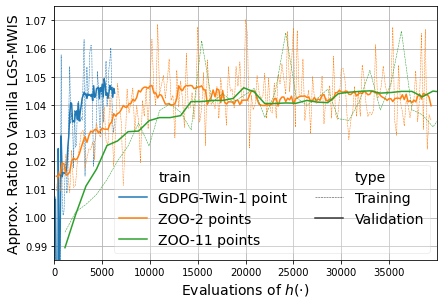

In [11]:
fig, ax = plt.subplots(1,1,sharey=True, figsize=(8, 6))
for item in ['Actor']:
    sns.lineplot(x="calls", y="ratio", hue="train", style='type', 
                 hue_order=['GDPG-Twin-1 point','ZOO-2 points','ZOO-11 points'],
                 style_order=['Validation','Training'],
                 size='type',
                 sizes={'Validation':1.5,'Training':0.5},
                 data=df_tmp,
                 ci=None, ax=ax,
                 linewidth=1.0, markersize=10, 
                 palette="tab10", markers=False, dashes=True)
    
ax.set_xlim([0, 40000])
ax.set_xticks(np.arange(0,40000,5000))

ax.grid(True)
ax.set_ylim([0.985, 1.075])
ax.set_yticks(np.arange(0.99,1.07,0.01))
ax.set_xlabel("Evaluations of $h(\cdot)$", fontsize=14)
ax.set_ylabel("Approx. Ratio to Vanilla LGS-MWIS", fontsize=14)

ax.legend(fontsize=14, framealpha=0.3, ncol=2)
fig.set_size_inches(6, 4)
fname='./output/convergence_sampling.pdf'
# pp = PdfPages(fname)
plt.tight_layout(pad=0.1)
plt.subplots_adjust(left=0.11, right=0.995, top=0.995, bottom=0.115)
fig.savefig(fname,
            dpi=300, #facecolor='w', edgecolor='w',
            orientation='portrait',
            format='pdf')
